**1. Install Required Libraries and Upload the Dataset**

In [2]:
# Install required libraries
!pip install pandas scikit-learn matplotlib
from google.colab import files

# 📁 Upload CSV file manually
uploaded = files.upload()  # Upload 'Crop_recommendation.csv'


Saving Crop_recommendation.csv to Crop_recommendation.csv


**2. Load and Preview Dataset**

In [3]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv("Crop_recommendation.csv")

# View the first few rows
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**3. Feature and Label Separation**

In [4]:
# Separate features and target label
X = df.drop("label", axis=1)  # Features
y = df["label"]               # Target (crop type)


**4. Train-Test Split (70:30)**

In [5]:
from sklearn.model_selection import train_test_split

#  Split into train and test sets (70:30 split as per the paper)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**5. Train Random Forest Model**

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

**6. Evalute the Model**

*  ***Model Accuracy***

In [7]:
# Check accuracy on test data
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.99


*    ***Classification Report***

In [11]:
from sklearn.metrics import classification_report

# Predict labels
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.87      0.97      0.92        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
   

*   ***Classification Report***

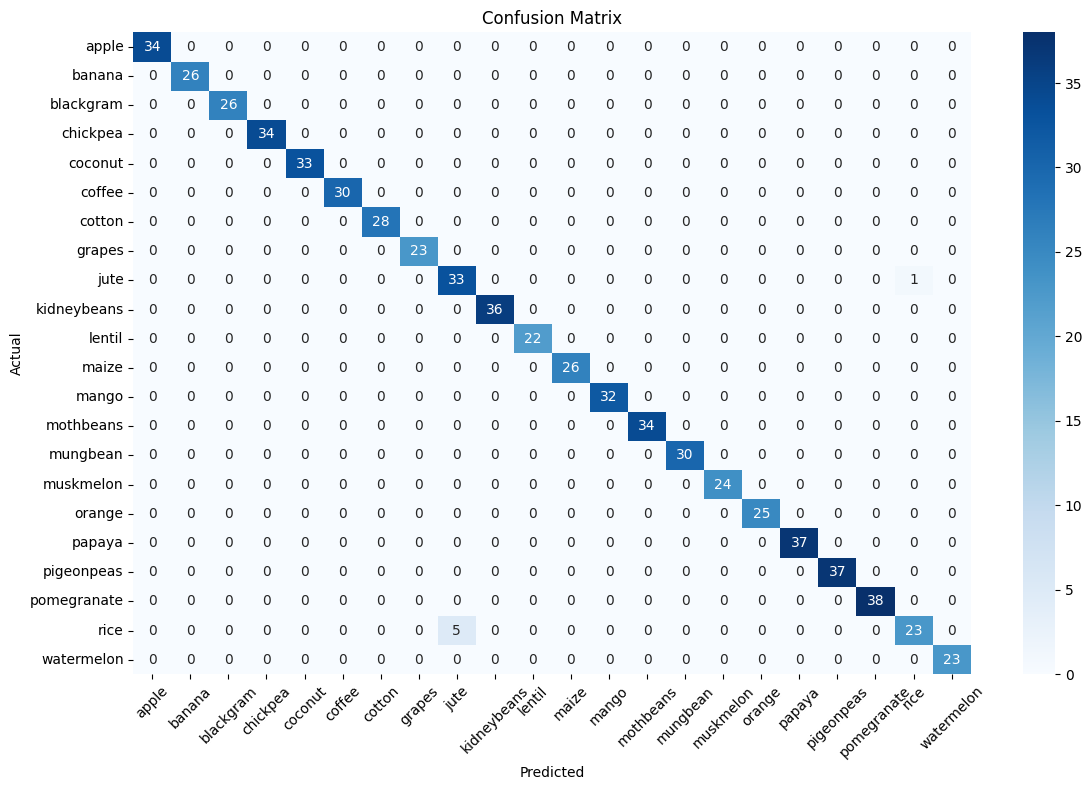

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


*   ***Confusion Matrix***

/tmp/ipython-input-13-1204029895.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")
/tmp/ipython-input-13-1204029895.py:10: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


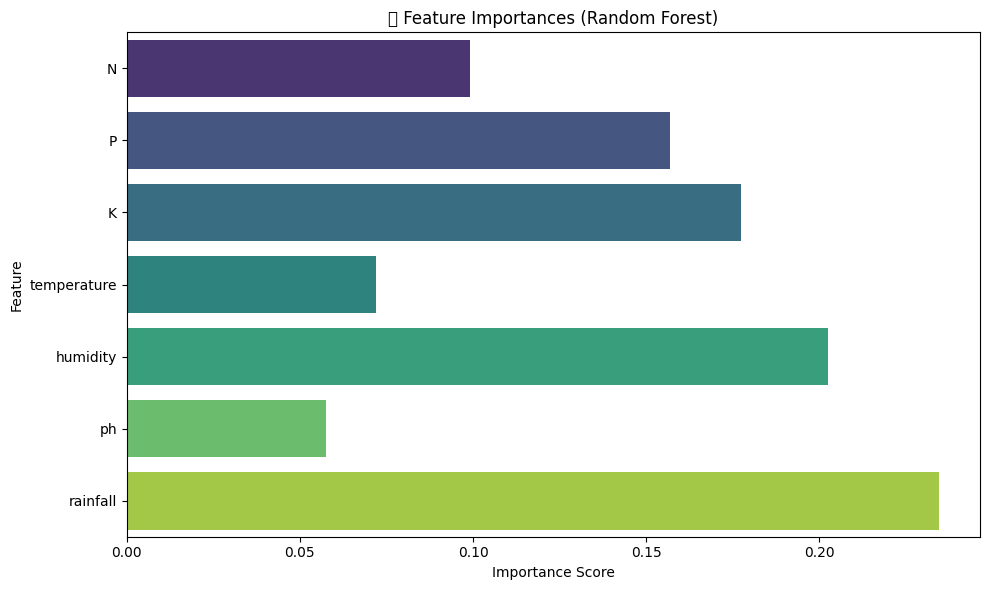

In [13]:
# Plot feature importances
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("🌾 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**7. Save the Trained Model**

In [8]:
import pickle

# Save the trained model to a file
with open("crop_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as crop_model.pkl")


Model saved as crop_model.pkl


**8. Download the Model File**

In [14]:
from google.colab import files

# Download the trained model file
files.download("crop_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>